# Spotify - Hit or not?

Based on data from Spotify's API containing top and non top 50 tracks from 54 countries' Top 50 playlists plus Global Top 50, and randomly selected non top 50 playlists.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True, precision=3)

In [3]:
df = pd.read_csv("../datasets/spotify.csv")

## Track features

**Source:** Spotify API

**music_ID:** The Spotify ID for the track.

**title:** Title

**artist:** Artist

**danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

**loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
time_signature	int	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration_ms:** The duration of the track in milliseconds.

**top_50:** 1 if is a hit or 0 if is not.

In [4]:
# dataframe

df

,music_ID,title,artist,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,top_50
0,47EiUVwUp4C9fGccaPuUCS,Dakiti,"Bad Bunny, Jhay Cortez",0.731,0.573,-10.059,0,0.054,0.401,0.113,0.145,109.928,205090,1
1,35mvY5S1H3J2QZyna3TFe0,Positions,Ariana Grande,0.737,0.802,-4.771,1,0.088,0.468,0.093,0.682,144.015,172325,1
2,54bFM56PmE4YLRnqpW6Tha,Therefore I Am,Billie Eilish,0.889,0.340,-7.773,0,0.070,0.218,0.055,0.716,94.009,174321,1
3,4saklk6nie3yiGePpBwUoc,BE,BTS,0.746,0.765,-4.410,0,0.099,0.011,0.094,0.737,114.044,199054,1
4,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),"24kGoldn, iann dior",0.700,0.722,-3.558,0,0.037,0.221,0.272,0.756,90.989,140526,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,32zrJNyJdpoMOqW7u3PEgo,Goofy,MishCatt,0.752,0.636,-5.900,0,0.109,0.074,0.191,0.560,170.110,200977,0
1602,1bRjwdtScY2eMe9uMmsOkG,Do It,Chloe x Halle,0.701,0.668,-7.287,0,0.052,0.092,0.111,0.553,82.978,176787,0
1603,44gz3bzhdcGUFgA5oc1wSu,Holiday,Little Mix,0.712,0.676,-5.965,1,0.184,0.076,0.067,0.648,106.156,213597,0
1604,4YAg8h8WliHZlW5wuv8Jpk,To Be Young (feat. Doja Cat),"Anne-Marie, Doja Cat",0.525,0.649,-4.802,1,0.066,0.241,0.129,0.286,155.995,194758,0


In [5]:
# non null values

df.isnull().sum()

music_ID        0
title           0
artist          0
danceability    0
energy          0
loudness        0
mode            0
speechiness     0
acousticness    0
liveness        0
valence         0
tempo           0
duration_ms     0
top_50          0
dtype: int64

In [6]:
# type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   music_ID      1606 non-null   object 
 1   title         1606 non-null   object 
 2   artist        1606 non-null   object 
 3   danceability  1606 non-null   float64
 4   energy        1606 non-null   float64
 5   loudness      1606 non-null   float64
 6   mode          1606 non-null   int64  
 7   speechiness   1606 non-null   float64
 8   acousticness  1606 non-null   float64
 9   liveness      1606 non-null   float64
 10  valence       1606 non-null   float64
 11  tempo         1606 non-null   float64
 12  duration_ms   1606 non-null   int64  
 13  top_50        1606 non-null   int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 175.8+ KB


In [7]:
# dataframe statistical summary

df.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,top_50
count,1606.000,1606.000,1606.000,1606.000,1606.000,1606.000,1606.000,1606.000,1606.000,1606.000,1606.000
mean,0.685,0.652,-6.278,0.564,0.103,0.260,0.181,0.545,123.092,200067.361,0.593
std,0.138,0.162,2.441,0.496,0.093,0.238,0.149,0.223,28.946,46623.226,0.491
min,0.128,0.089,-20.384,0.000,0.023,0.000,0.026,0.050,62.507,105176.000,0.000
25%,0.597,0.551,-7.521,0.000,0.040,0.060,0.094,0.367,99.069,170972.250,0.000
50%,0.702,0.666,-5.939,1.000,0.063,0.190,0.124,0.548,121.537,193208.000,1.000
75%,0.787,0.767,-4.660,1.000,0.133,0.400,0.211,0.713,143.434,220624.500,1.000
max,0.974,0.991,-0.787,1.000,0.884,0.963,0.964,0.981,205.602,620101.000,1.000


In [8]:
# number and % of top 50 and non top 50 tracks

print("Proporção:\n\n", df["top_50"].value_counts(normalize=True))
print("\n\n Frequência:\n\n", df["top_50"].value_counts())

Proporção:

 1   0.593
0   0.407
Name: top_50, dtype: float64


 Frequência:

 1    952
0    654
Name: top_50, dtype: int64


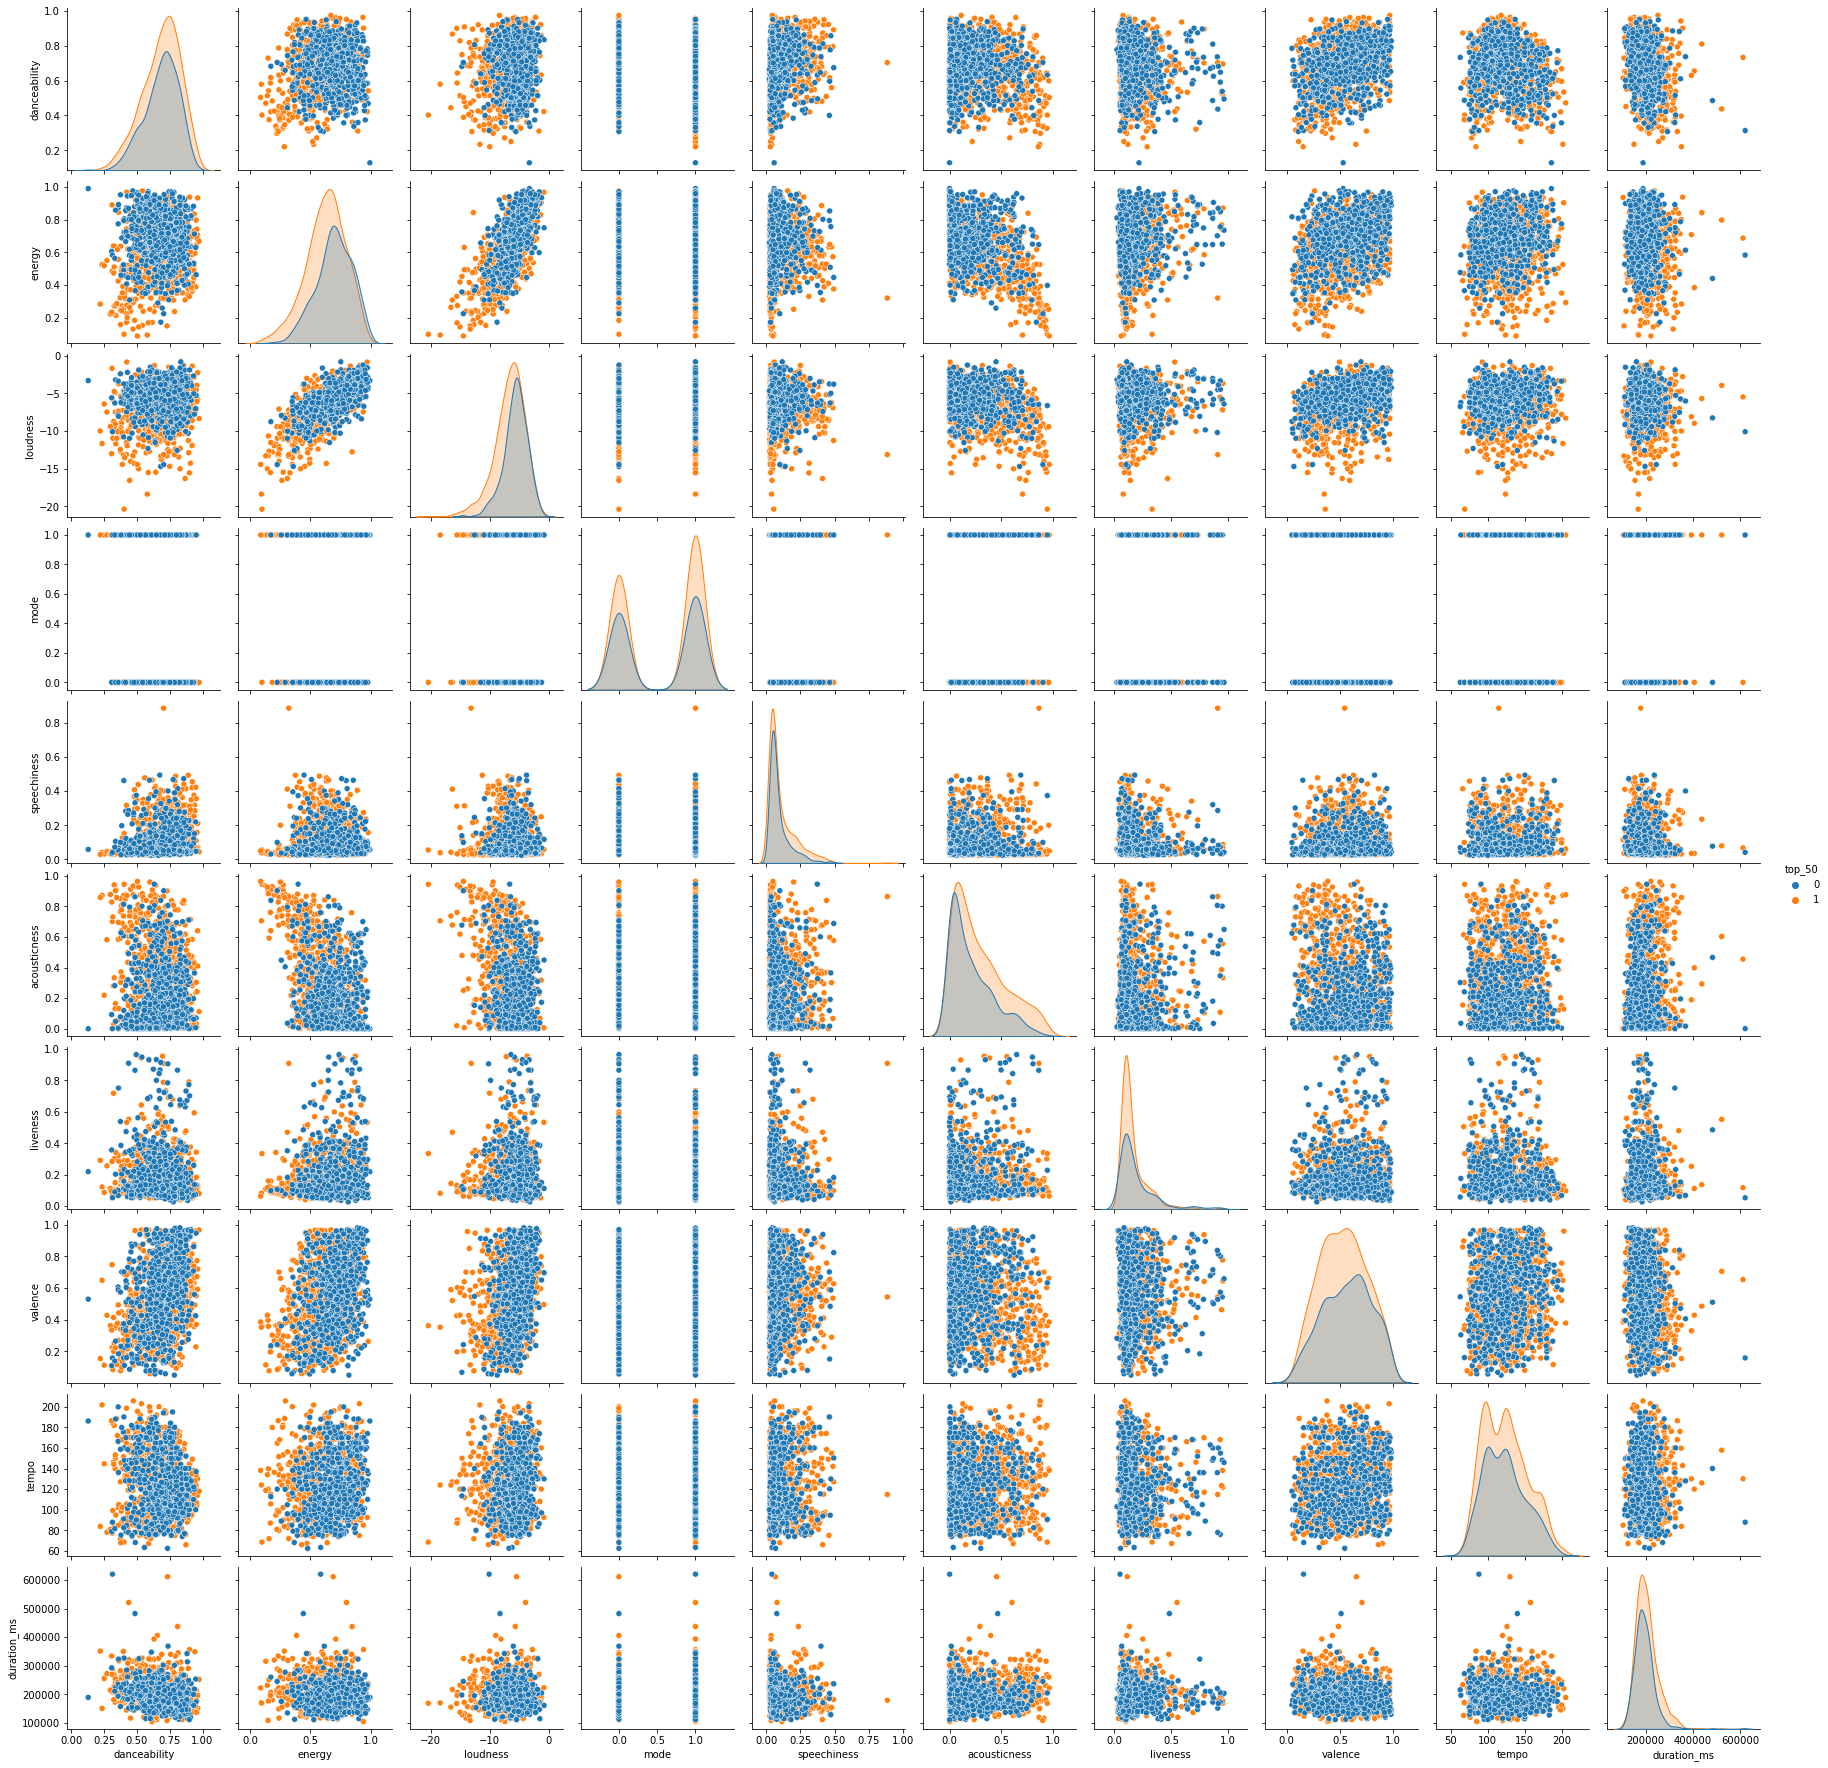

In [9]:
# pairplot by top 50 or non top 50

sns.pairplot(df.select_dtypes(include=[np.number]),
             kind="scatter", diag_kind="kde", hue="top_50")

Very homogeneous dataset.

<AxesSubplot:>

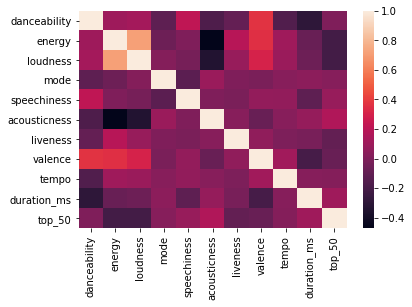

In [10]:
sns.heatmap(df.corr())

Correlation on valence with danceability, energy and loudness, indicating that happier songs are louder and more danceable and energical.

<AxesSubplot:>

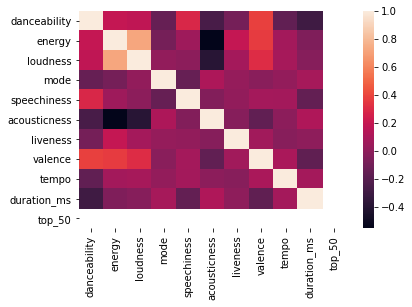

In [28]:
sns.heatmap(df[~(df["top_50"] == 0)].corr())

<AxesSubplot:>

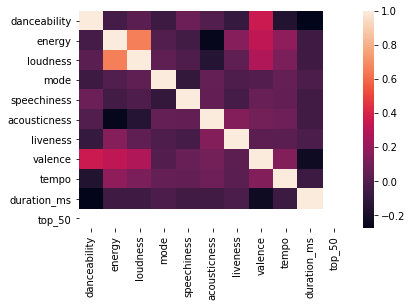

In [30]:
sns.heatmap(df[~(df["top_50"] == 1)].corr())

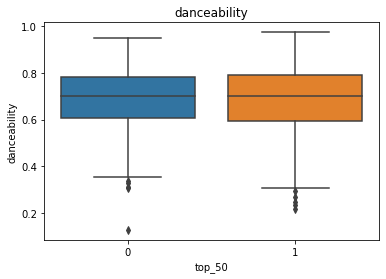

____________________________________________________


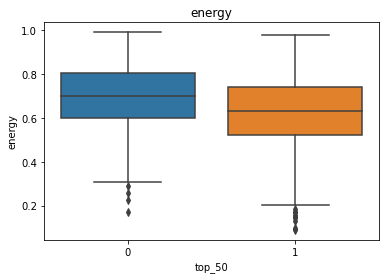

____________________________________________________


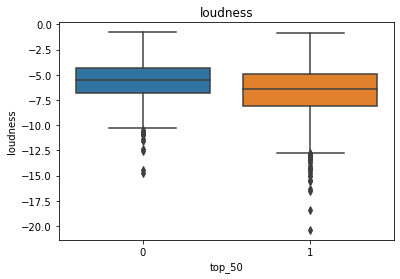

____________________________________________________


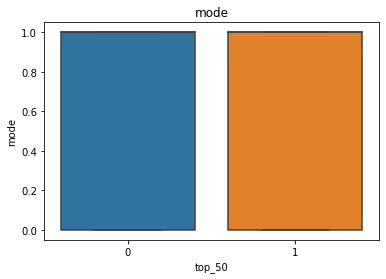

____________________________________________________


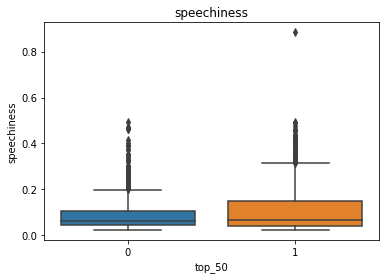

____________________________________________________


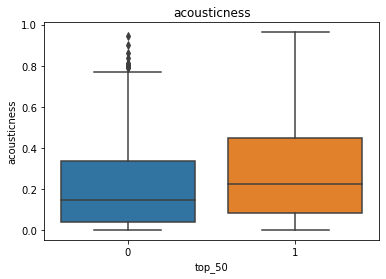

____________________________________________________


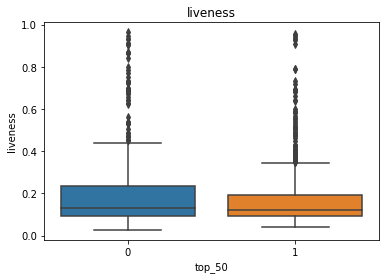

____________________________________________________


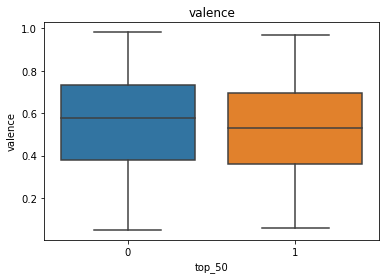

____________________________________________________


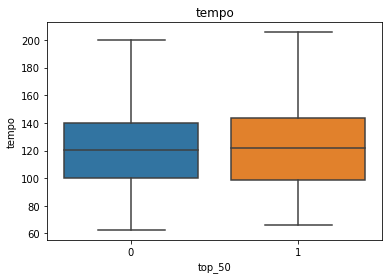

____________________________________________________


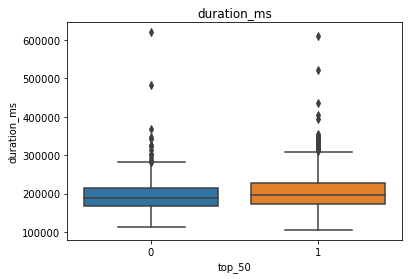

____________________________________________________


In [11]:
# creating boxplot for each numerical column from the dataset

bx = df.select_dtypes(include=[np.number])

for x in range(0,len(bx.columns.tolist())-1,1):
    c = str(bx.columns.tolist()[x])
    
    plt.title(c)
    sns.boxplot(data=bx, x=bx["top_50"], y=bx[c])
    plt.show()

    print("____________________________________________________")

Lots of outliers

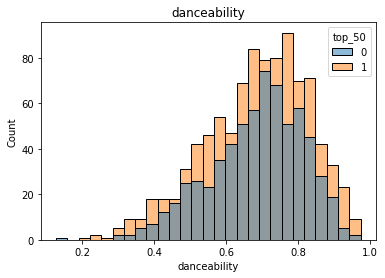

____________________________________________________


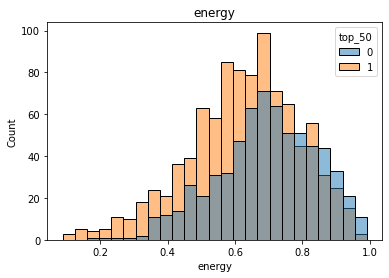

____________________________________________________


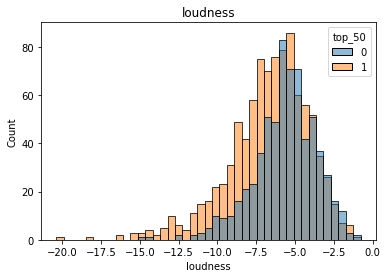

____________________________________________________


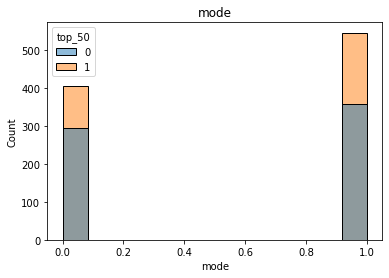

____________________________________________________


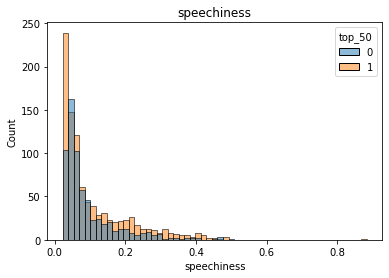

____________________________________________________


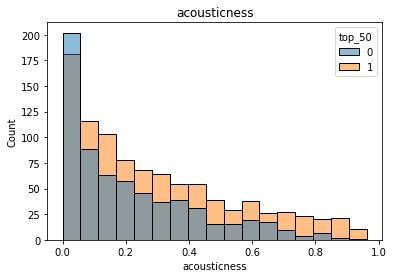

____________________________________________________


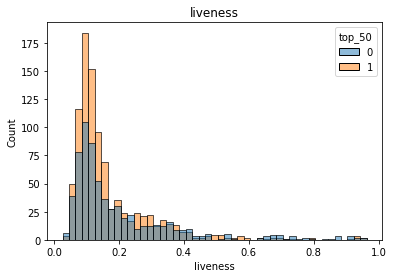

____________________________________________________


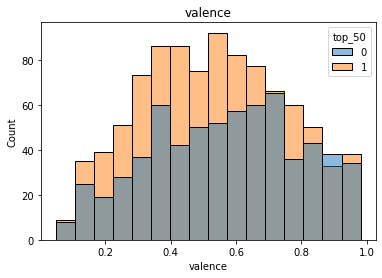

____________________________________________________


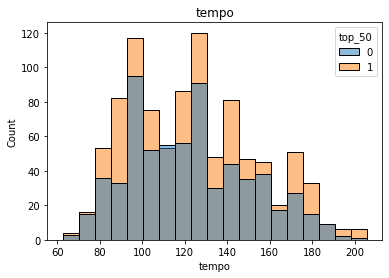

____________________________________________________


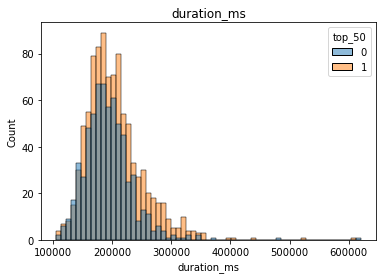

____________________________________________________


In [12]:
# histplot for each numerical column from the data

bx = df.select_dtypes(include=[np.number])

for x in range(0,len(bx.columns.tolist())-1,1):
    c = str(bx.columns.tolist()[x])
    
    plt.title(c)
    sns.histplot(data=bx, x=bx[c], hue=bx["top_50"])
    plt.show()

    print("____________________________________________________")

## Logistic Regression

In [31]:
# separating dataset into numerical dataset and the target feature

X = df.select_dtypes(include=[np.number]).drop(columns="top_50")
y = df["top_50"]

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
estimador = LogisticRegression()

In [49]:
# 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
modelo = estimador.fit(X_train, y_train)

In [51]:
print("Intercepto: ", modelo.intercept_)
print("Coeficientes: ", modelo.coef_)

Intercepto:  [-0.]
Coeficientes:  [[-0. -0. -0.  0.  0.  0. -0. -0. -0.  0.]]


In [52]:
y_pred = modelo.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))


Matriz de confusão do modelo nos dados de teste:

[[  0 117]
 [  0 205]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       117
           1       0.64      1.00      0.78       205

    accuracy                           0.64       322
   macro avg       0.32      0.50      0.39       322
weighted avg       0.41      0.64      0.50       322



/Users/Dean/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Not a relevant model!

___

## LinearSVC

In [70]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

estimador = LinearSVC()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
modelo = estimador.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      1.00      0.53       117
           1       0.00      0.00      0.00       205

    accuracy                           0.36       322
   macro avg       0.18      0.50      0.27       322
weighted avg       0.13      0.36      0.19       322



/Users/Dean/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/Dean/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [73]:
from sklearn.pipeline import Pipeline

# o que queremos utilizar para construir o modelo
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# instanciando a classe
pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier())])

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = {'knn__n_neighbors': np.arange(1, 30),
              'knn__weights':['uniform', 'distance'], 
              'knn__metric':["euclidean", 'manhattan', "chebyshev", "minkowski"]}

# os quatro principais principais parâmetros!
grid = GridSearchCV(pipe, param_grid, scoring="f1_weighted", cv=5)

In [75]:
modelo = grid.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))


Matriz de confusão do modelo nos dados de teste:

[[ 64  53]
 [ 56 149]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

           0       0.53      0.55      0.54       117
           1       0.74      0.73      0.73       205

    accuracy                           0.66       322
   macro avg       0.64      0.64      0.64       322
weighted avg       0.66      0.66      0.66       322



In [77]:
modelo.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 26, 'knn__weights': 'uniform'}

In [78]:
modelo.best_score_

0.601779072284133

## Adaboost

In [26]:
from sklearn.ensemble import AdaBoostClassifier

estimador = AdaBoostClassifier()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
modelo = estimador.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.44      0.46       117
           1       0.70      0.73      0.71       205

    accuracy                           0.62       322
   macro avg       0.59      0.59      0.59       322
weighted avg       0.62      0.62      0.62       322



## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

estimador = RandomForestClassifier()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
modelo = estimador.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.44      0.48       117
           1       0.71      0.78      0.74       205

    accuracy                           0.66       322
   macro avg       0.62      0.61      0.61       322
weighted avg       0.64      0.66      0.65       322

